# Data Visualization with Netflix Dataset


#### Sources of learning:
* https://www.kaggle.com/bhartiprasad17/netflix-movies-and-tv-shows-eda
* https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly
* https://www.kaggle.com/joshuaswords/netflix-data-visualization

## 1) Import Necessary Libraries
First, we need to import certain libraries.

In [111]:
#data analysis
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


#Prediction
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.preprocessing import MultiLabelBinarizer 

#Others
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

## 2) Read Data
Import csv dataset into this kernel

In [2]:
df = pd.read_csv("C:/Users/tommy/Python/Folder Python Laptop Kantor/Netflix/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 3) Data Analysis
Define features, data type and null information.

In [4]:
#see a sample of the dataset to get an idea of the variables
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6304,s6305,TV Show,The Disastrous Life of Saiki K.: Reawakened,NaN,"Hiroshi Kamiya, Daisuke Ono, Nobunaga Shimazak...",Japan,"December 30, 2019",2019,TV-14,1 Season,"Anime Series, International TV Shows",Kusuo and his gaggle of self-proclaimed friend...
5934,s5935,TV Show,Swami Baba Ramdev: The Untold Story,NaN,"Naman Jain, Kranti Prakash Jha, Tej Sapru, Che...",NaN,"May 1, 2018",2018,TV-14,1 Season,"International TV Shows, TV Dramas","Born into poverty and denied an education, a v..."
2679,s2680,Movie,Heartthrob,Chris Sivertson,"Aubrey Peeples, Keir Gilchrist, Peter Facinell...",United States,"January 1, 2018",2017,TV-MA,87 min,Thrillers,"A shy, brilliant boy and a popular girl fall i..."
1455,s1456,TV Show,Cold Case Files Classic,NaN,Bill Kurtis,United States,"September 15, 2020",1999,TV-MA,1 Season,"Crime TV Shows, Docuseries",Through forensic science and criminal psycholo...
6392,s6393,Movie,The Giant,"Aitor Arregi, Jon Garaño","Joseba Usabiaga, Eneko Sagardoy, Iñigo Aranbur...",Spain,"November 15, 2018",2017,TV-14,115 min,"Dramas, International Movies","In 1843, crippled Martin returns from war to h..."


In [5]:
#columns and data type
print(df.columns, "\n")
print(df.info())

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


Here we get the summary to categorize the columns:

* **Calendar Features:** release_year, date_added
* **Categorical Features:** type, rating
* **Alphanumeric Features:** show_id
* **Information:** title, director, cast, country, duration, listed_in, description

Check Null Data

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


Dealing with missing data:
* **director:** Define null value with no data because we only have 1/3 of missing value and not really necessary to fill based on remain data.
* **cast:**  Define null value with no data . There will be so much possibility for cast and no much information in this dataset related with cast.
* **country:** Replace null with the most common country with Mode.
* **date_added:** Will try to find the way to fill the null value
* **rating:** Will try to find the way to fill the null value

## 4) Data Preparation
Preparation before visualization

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### Add count number for calculation in the next process of visualization

In [9]:
df['count'] = 1

#### Fix Rating Missing Value

In [10]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [11]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,1
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",1
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",1
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",1
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,1
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,1
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",1


Only 7 rows, So we will fill it with data from internet

In [12]:
 rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate
    

In [13]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count


#### Fix Country Missing Value

In [14]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [15]:
df[df['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count


#### Fix Date Added Missing Value

In [16]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",1
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,1
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,1
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,1
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",1
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,1
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",1
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",1
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",1
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",1


Because it is hard to find the exact data those title added to Netflix, so I will drop these as they are only 10

In [17]:
df=df[df["date_added"].notna()]

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1


#### Fix Cast and Director Missing Value

In [19]:
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

#### Custom Date Information

In [20]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,12,December,2018


#### Multiple Values on Country

In [21]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

#### Check The Data

In [22]:
df.isna().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
count                0
month_added          0
month_name_added     0
year_added           0
principal_country    0
dtype: int64

#### Add target viewer based on rating

* Kids, Teens, Older Kids, Adults

In [23]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)

In [100]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count,month_added,month_name_added,year_added,principal_country,target_ages
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1,8,August,2020,Brazil,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,12,December,2016,Mexico,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,12,December,2018,Singapore,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,11,November,2017,United States,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,January,2020,United States,Teens


#### Grouping Genre

Create new column that store information about genre

In [101]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['genre'].head()

0    [International TV Shows, TV Dramas, TV Sci-Fi ...
1                       [Dramas, International Movies]
2                [Horror Movies, International Movies]
3    [Action & Adventure, Independent Movies, Sci-F...
4                                             [Dramas]
Name: genre, dtype: object

In [112]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [113]:
genres_df = calculate_mlb(df['genre'])

In [117]:
genres_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Fix Data Type

In [25]:
df.dtypes

show_id                      object
type                         object
title                        object
director                     object
cast                         object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
count                         int64
month_added                   int64
month_name_added             object
year_added                    int64
principal_country            object
target_ages                  object
dtype: object

In [26]:
# Categorical Type
df['type'] = pd.Categorical(df['type'])
# Categorical target ages
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# int Year
df['year_added'] = pd.to_numeric(df['year_added'])

In [27]:
df.dtypes

show_id                      object
type                       category
title                        object
director                     object
cast                         object
country                      object
date_added           datetime64[ns]
release_year                  int64
rating                       object
duration                     object
listed_in                    object
description                  object
count                         int64
month_added                   int64
month_name_added             object
year_added                    int64
principal_country            object
target_ages                category
dtype: object

## 5) Data Visualization
Find any insight through visualization

### A. Comparison of Type

In [29]:
col = "type"
grouped = df[col].value_counts().reset_index()
grouped_type = grouped.rename(columns = {col : "count", "index" : col})

In [30]:
grouped_type

,type,count
0,Movie,5377
1,TV Show,2400


In [31]:
grouped_type['count'].tolist()

[5377, 2400]

In [32]:
grouped_type['type'].tolist()

['Movie', 'TV Show']

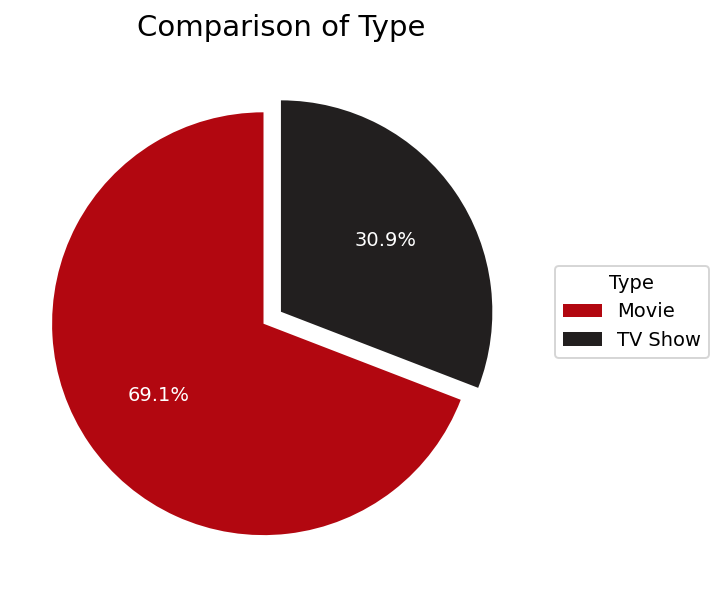

In [33]:
fig, ax = plt.subplots(figsize =(8, 5))

y = grouped_type['count'].tolist()
mylabels = grouped_type['type'].tolist()

plt.pie(y, labels = mylabels, colors = ["#b20710", "#221f1f"], explode = [0.1,0],  autopct='%1.1f%%', textprops=dict(color="w"),startangle=90)
plt.title('Comparison of Type', fontsize=15)
plt.legend(title="Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show() 

Movie has 69% more than TV Show in Netflix

### B. The Growth of Content Added

In [35]:
d_tv = df[df["type"] == "TV Show"]
d_mov = df[df["type"] == "Movie"]


In [36]:
col = "year_added"

#TV Show
gr1 = d_tv[col].value_counts().reset_index()
gr1 = gr1.rename(columns = {col : "count", "index" : col})
total_gr1 = sum(gr1['count'])
gr1['Percent to total'] = gr1['count'].apply(lambda x: 100 * x / total_gr1)
gr1 = gr1.sort_values(col)

#Movie
gr2 = d_mov[col].value_counts().reset_index()
gr2 = gr2.rename(columns = {col : "count", "index" : col})
total_gr2 = sum(gr2['count'])
gr2['Percent to total'] = gr2['count'].apply(lambda x: 100 * x / total_gr2)
gr2 = gr2.sort_values(col)

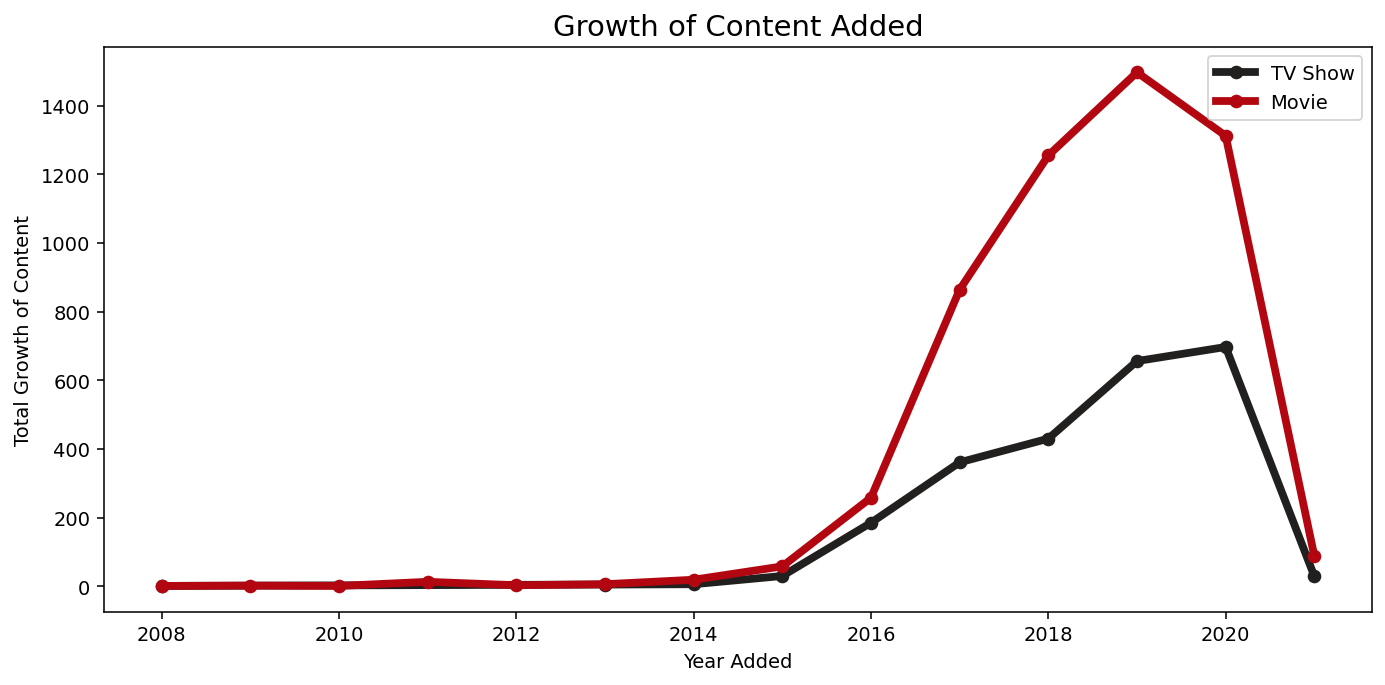

In [37]:
plt.figure(figsize=(10,5))
plt.plot(gr1[col],gr1["count"], '-o',label = 'TV Show',linewidth = 4,color = "#221f1f") # Setting up legends
plt.plot(gr2[col],gr2["count"], '-o', label ='Movie', linewidth = 4, color = "#b20710") # Setting up legends
plt.xlabel("Year Added")
plt.ylabel("Total Growth of Content")
plt.title('Growth of Content Added', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

By this graph, we can assume that since 2016, streaming service demand has been increasing by the growth of total titles in Netflix. As Movies in 2020 were decreasing, the TV Shows increased.

### C. Countries on Netflix

In [39]:
from collections import Counter
country_data = df['principal_country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top10country = country_count.head(10)

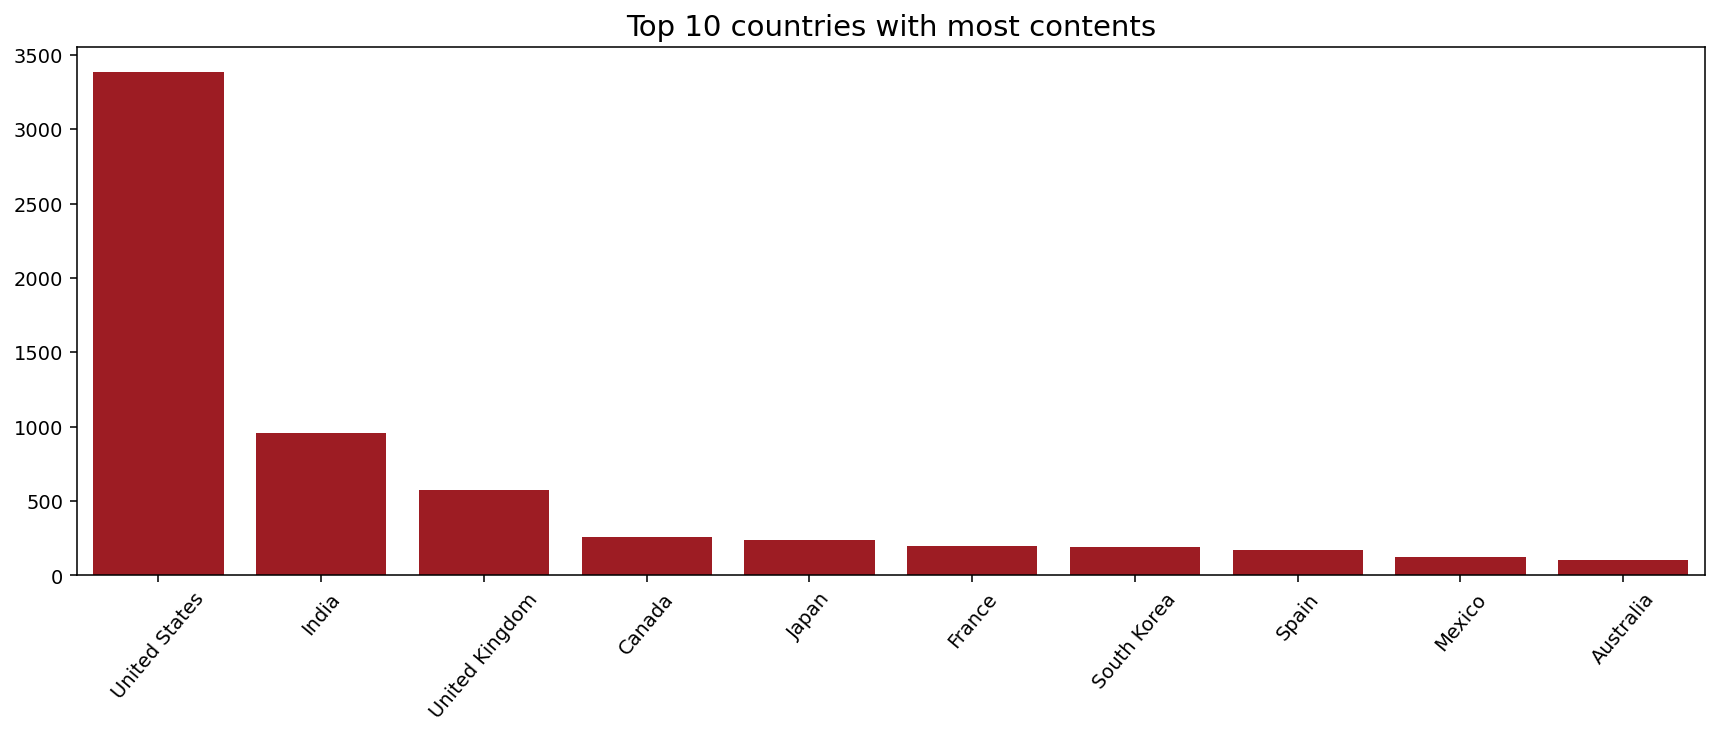

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x= top10country.index, y=top10country, color='#b20710')
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15)
plt.show()

In [41]:
country_order = df['principal_country'].value_counts()[:11].index
data_top10split = df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().loc[country_order].unstack()
data_top10split = data_top10split.rename(columns = {"":"principal_country"})
data_top10split.columns = data_top10split.columns.get_level_values(0)
data_top10split = data_top10split.reset_index()
data_top10split['sum'] = data_top10split['Movie'] + data_top10split['TV Show']

In [42]:
data_top10split['% Movie'] = (data_top10split['Movie'] / data_top10split['sum'])
data_top10split['% TV Show'] = (data_top10split['TV Show'] / data_top10split['sum'])

data_top10split = data_top10split.sort_values(by='% Movie',ascending=False)[::-1]
data_top10split = data_top10split.set_index('principal_country')

In [43]:
data_top10split.index

Index(['South Korea', 'Japan', 'Australia', 'United Kingdom', 'Mexico',
       'Canada', 'United States', 'France', 'Spain', 'Turkey', 'India'],
      dtype='object', name='principal_country')

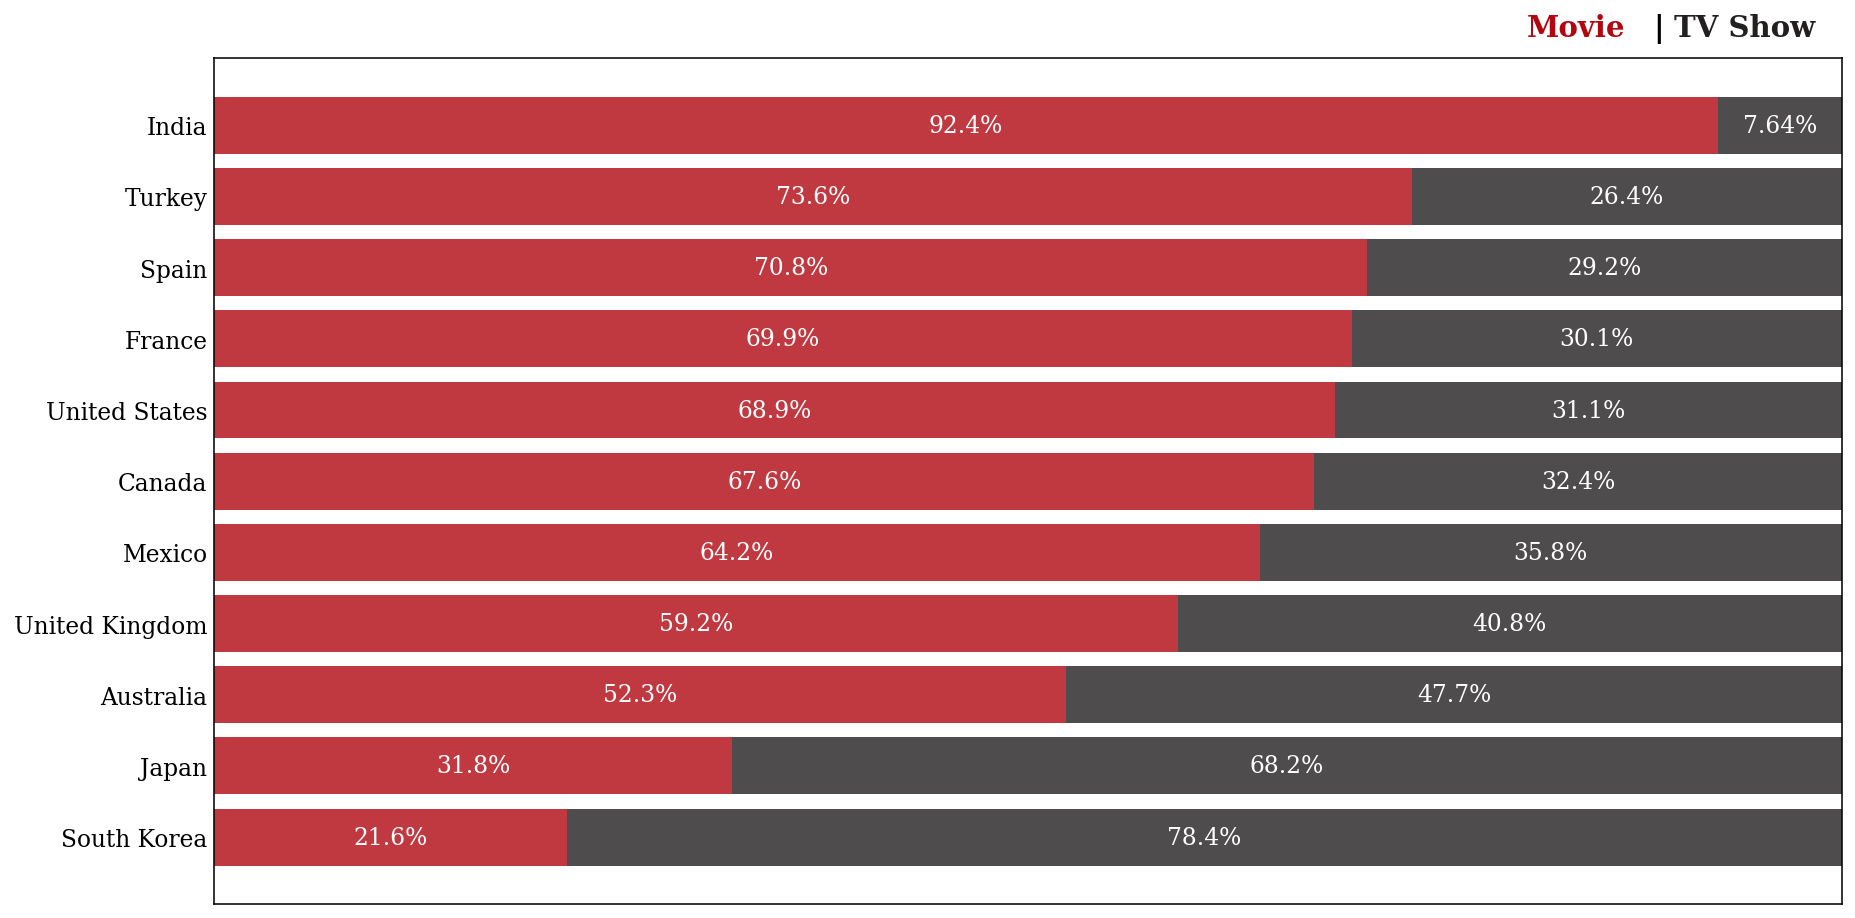

In [44]:
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_top10split.index, data_top10split['% Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_top10split.index, data_top10split['% TV Show'], left=data_top10split['% Movie'], 
        color='#221f1f', alpha=0.8, label='% TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_top10split.index, fontfamily='serif', fontsize=11)

# Percentage
for i in data_top10split.index:
    ax.annotate(f"{data_top10split['% Movie'][i]*100:.3}%", 
                   xy=(data_top10split['% Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_top10split.index:
    ax.annotate(f"{data_top10split['% TV Show'][i]*100:.3}%", 
                   xy=(data_top10split['% Movie'][i]+data_top10split['% TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

    
fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
    
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

Every country dominant by Movie except South Korea & Japan as we know that South Korea is famous by their Korean Drama around the world and Japan by their Anime.

### D. Rating on Netflix

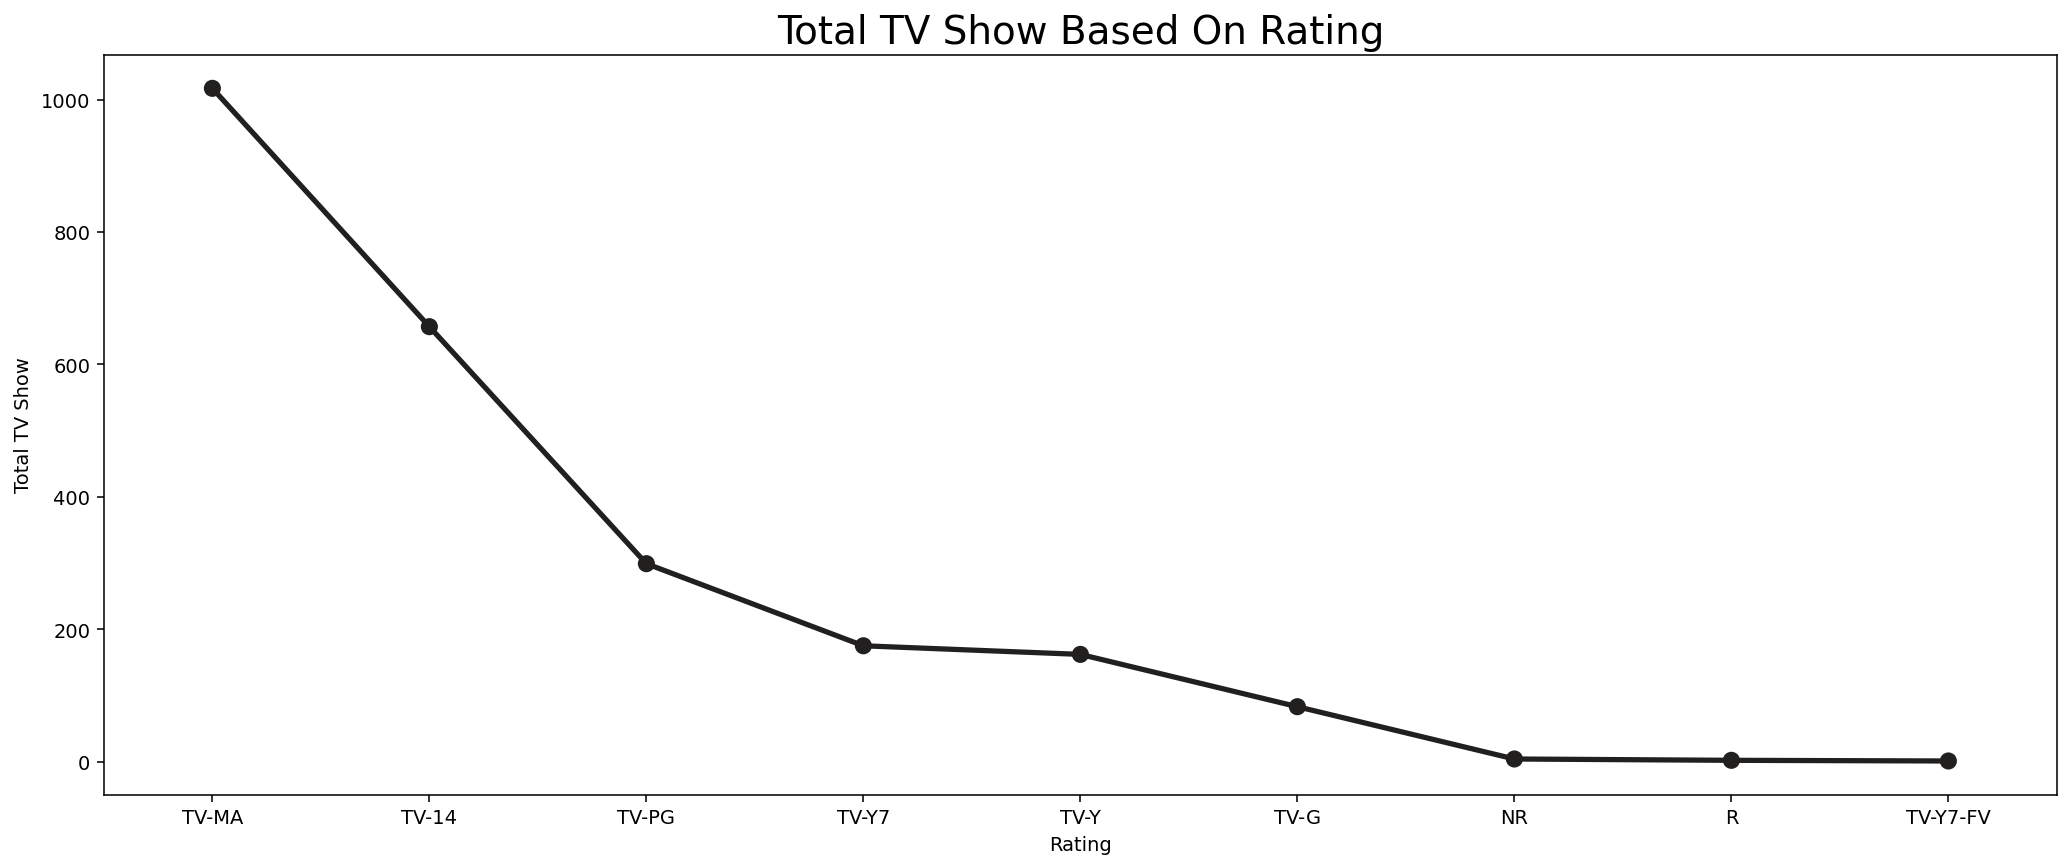

In [45]:
#TV Show
tv_ratings = d_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
g_tv = sns.pointplot(x='rating',y='count',data=tv_ratings, linewidth = 4,color = "#221f1f")
g_tv.set(xlabel="Rating", ylabel = "Total TV Show")
plt.title('Total TV Show Based On Rating',size='20')
plt.show()


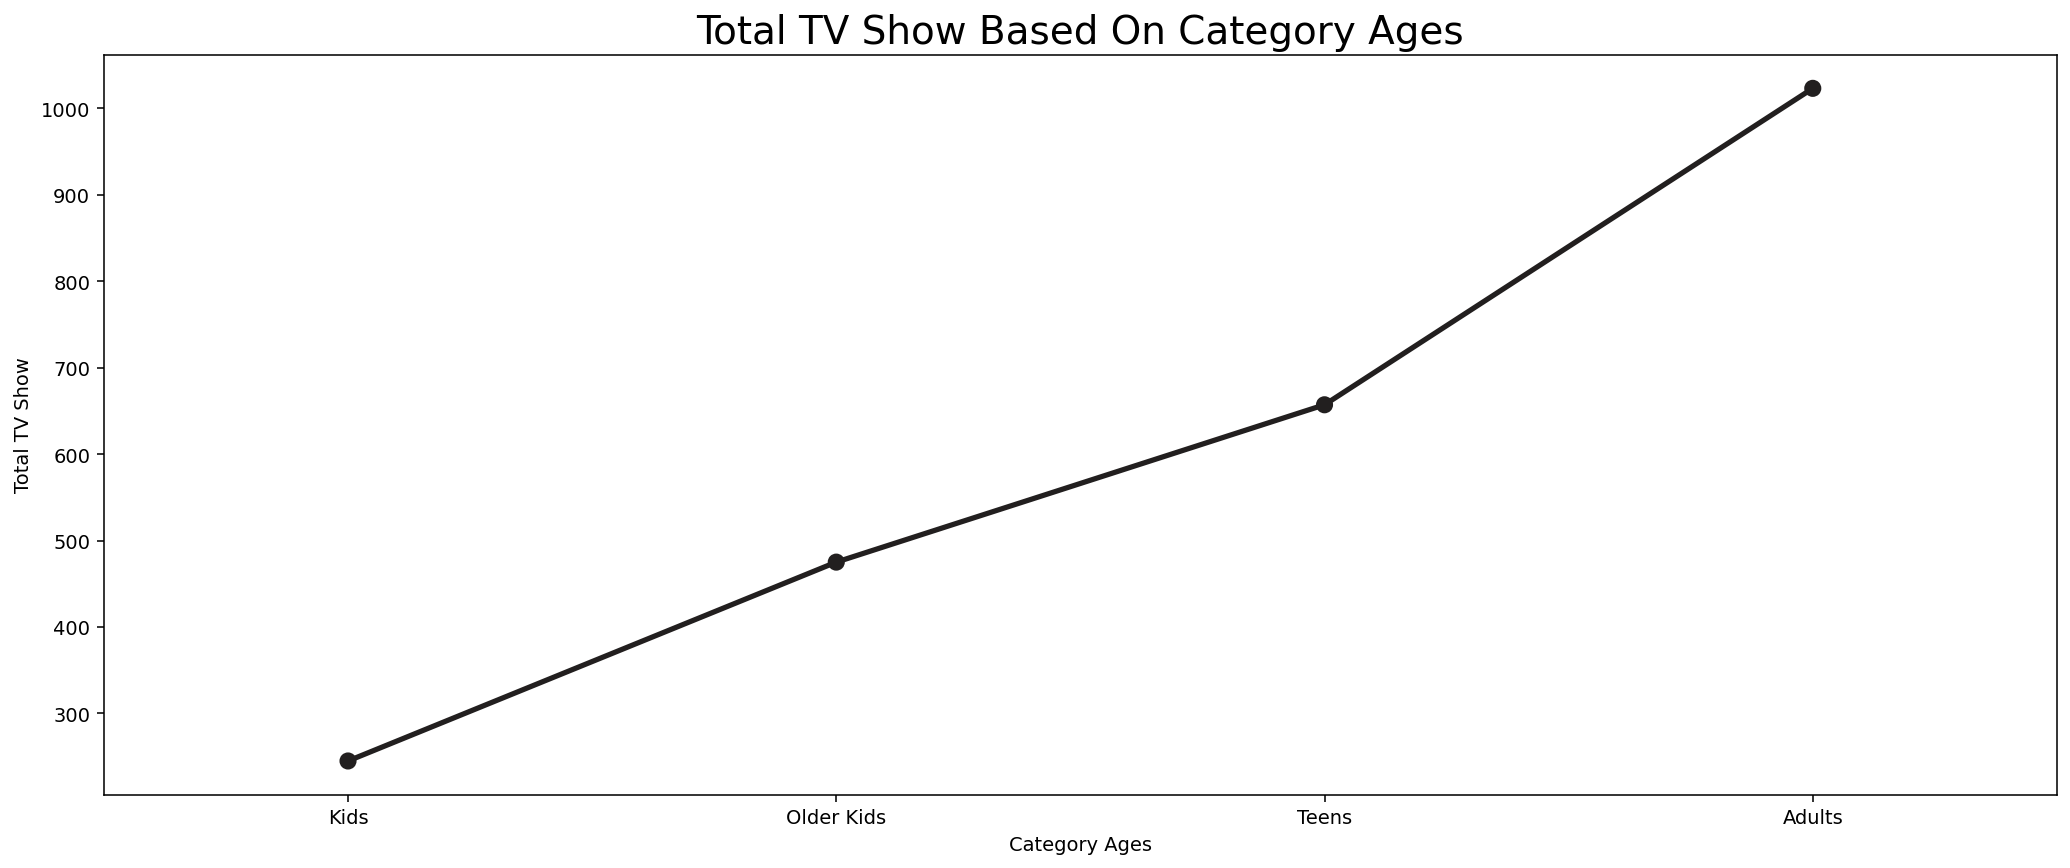

In [46]:
#TV Show
tv_ratings = d_tv.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
g_tv = sns.pointplot(x='target_ages',y='count',data=tv_ratings, linewidth = 4,color = "#221f1f")
g_tv.set(xlabel="Category Ages", ylabel = "Total TV Show")
plt.title('Total TV Show Based On Category Ages',size='20')
plt.show()


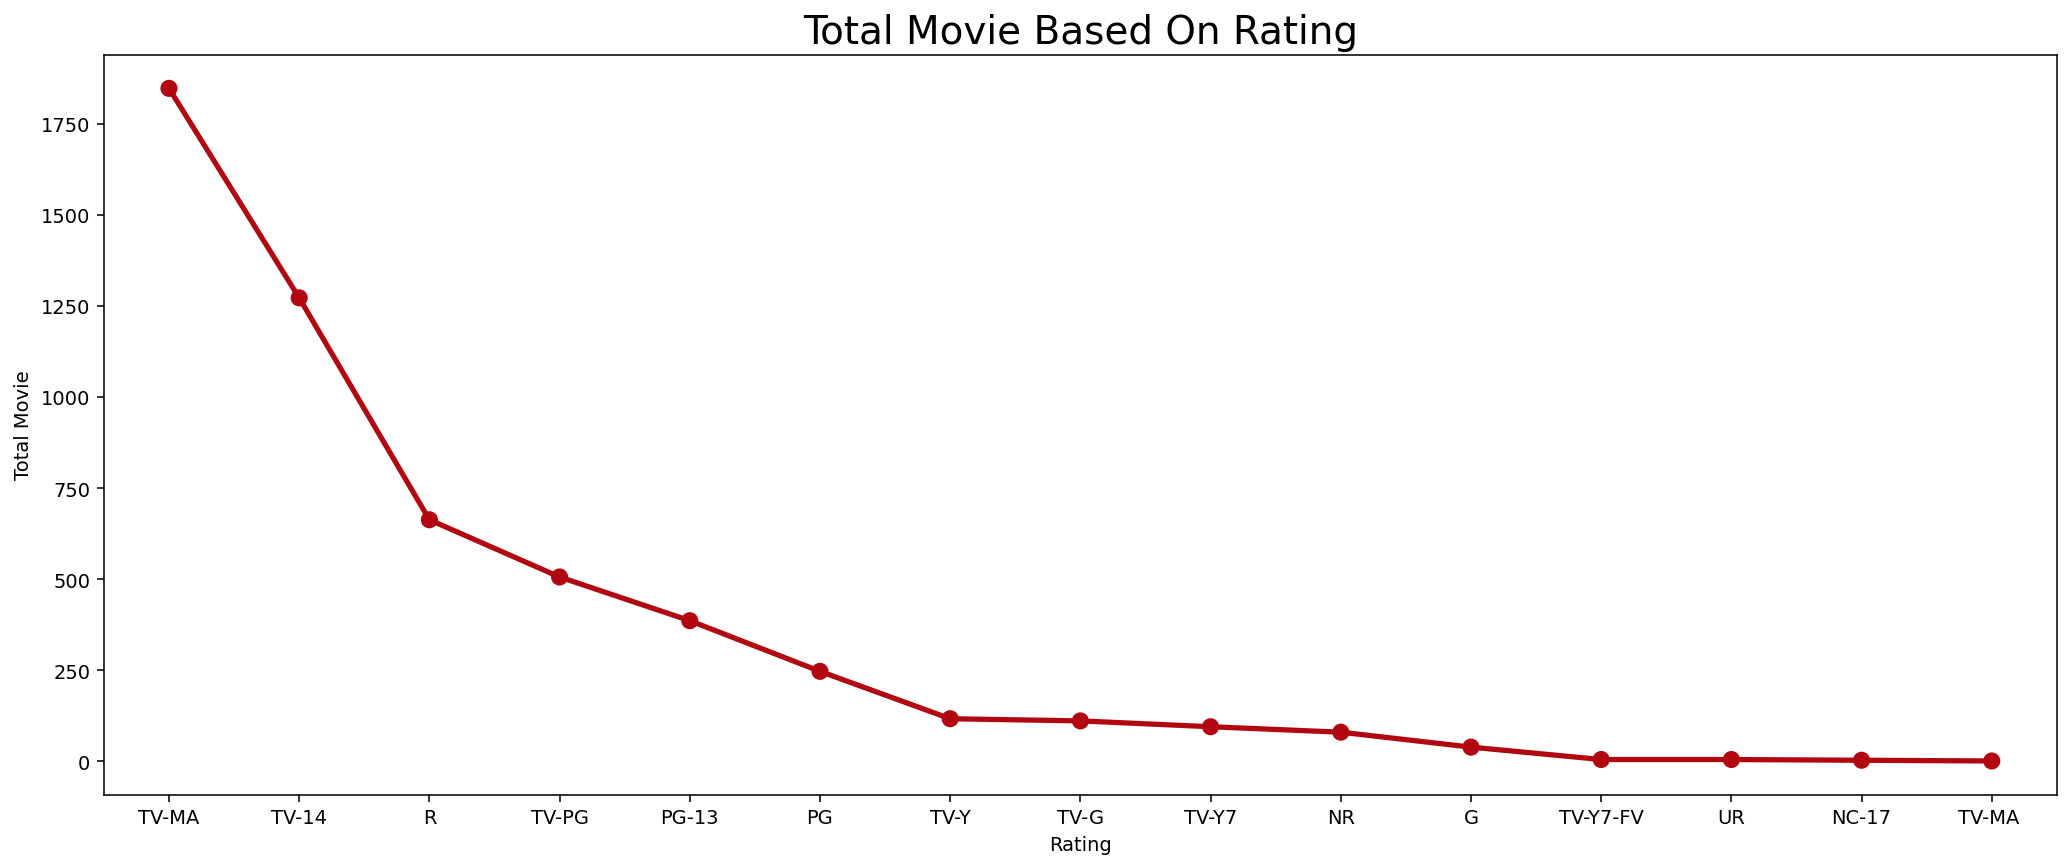

In [47]:
#movie
movie_ratings = d_mov.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
g_mov = sns.pointplot(x='rating',y='count',data=movie_ratings, linewidth = 4,color = "#b20710")
g_mov.set(xlabel="Rating", ylabel = "Total Movie")
plt.title('Total Movie Based On Rating',size='20')
plt.show()


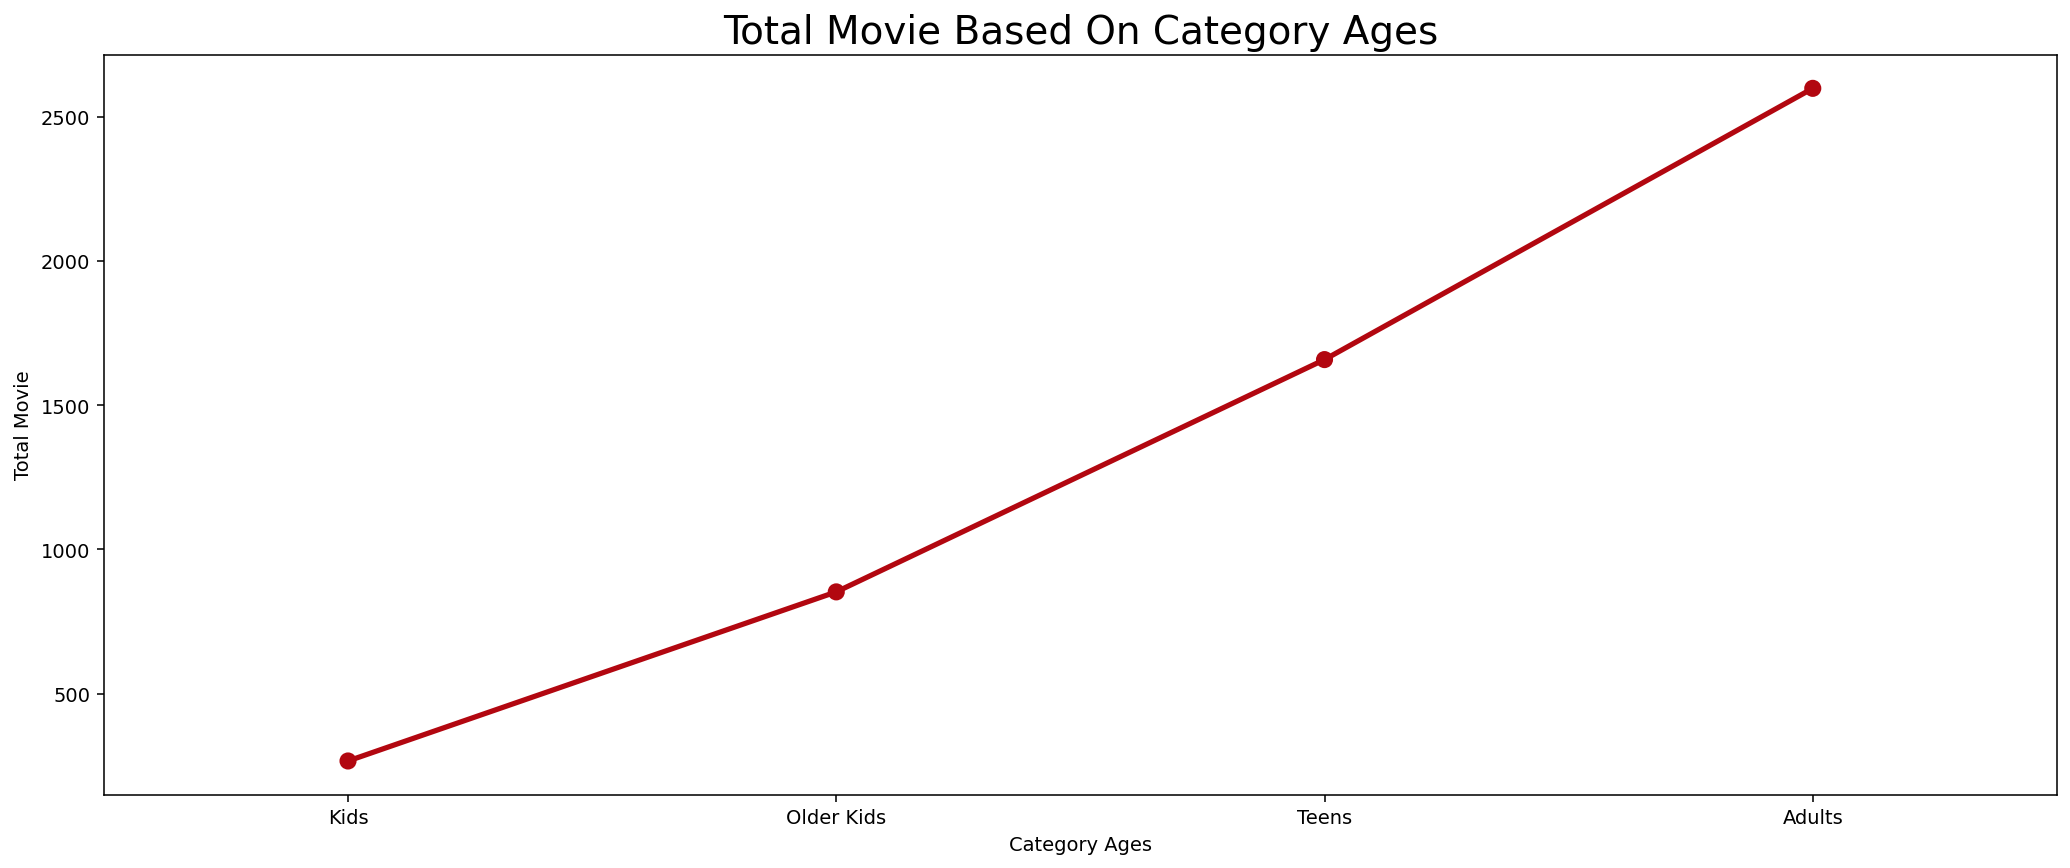

In [48]:
#movie
movie_ratings = d_mov.groupby(['target_ages'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
g_mov = sns.pointplot(x='target_ages',y='count',data=movie_ratings, linewidth = 4,color = "#b20710")
g_mov.set(xlabel="Category Ages", ylabel = "Total Movie")
plt.title('Total Movie Based On Category Ages',size='20')
plt.show()


Based on charts above, Shows in Netflix are more likely for Teens and Adults.

### Notes: Another analysis will be on the next version